In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
# fetch MNIST datasets
#from six.moves import urllib
#from sklearn.datasets import fetch_mldata
#try:
#    mnist = fetch_mldata('MNIST original')
#except urllib.error.HTTPError as ex:
#    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
#    from scipy.io import loadmat
#   mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
#    mnist_path = "./mnist-original.mat"
#    response = urllib.request.urlopen(mnist_alternative_url)
#    with open(mnist_path, "wb") as f:
#        content = response.read()
#        f.write(content)
#    mnist_raw = loadmat(mnist_path)
#    mnist = {
#        "data": mnist_raw["data"].T,
#        "target": mnist_raw["label"][0],
#        "COL_NAMES": ["label", "data"],
#        "DESCR": "mldata.org dataset: mnist-original",
#    }
#    print("Success!")

In [3]:
import scipy.io as sio
mnist_raw = sio.loadmat('mnist-original.mat')
mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
X, y = mnist["data"], mnist["target"]
X.shape # data dimension

(70000, 784)

In [4]:
y.shape # target value dimension

(70000,)

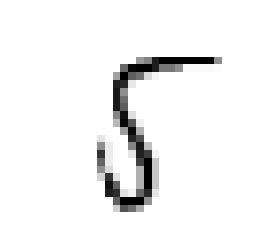

In [5]:
some_digit = X[34000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[34000]

5.0

In [7]:
# split train and test data set
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [8]:
# shuffle the indexes of X-train
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
# train  a binary classifier with taking only one digit, let it be 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
# train binary classfier using stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/home/alok-kumar/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

## Perfomance measure using crossvalidation with accuracy score

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9674 ,  0.9582 ,  0.96385])

In [13]:
from sklearn.base import BaseEstimator ## classify every image into not 5 
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never5clf = Never5Classifier()
cross_val_score(never5clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9096 ,  0.9087 ,  0.91065])

## confusion matrix performance measure

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
# let'd try confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54254,   325],
       [ 1886,  3535]])

In [17]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [18]:
# precision and recall score 

from sklearn.metrics import precision_score, recall_score, precision_recall_curve

precision = precision_score(y_train_5, y_train_pred)
print("Precision score:",  "{0:.2f}".format(precision))

Precision score: 0.92


In [19]:
recall = recall_score(y_train_5, y_train_pred)
print("Recall score: ", "{0:.2f}".format(recall))

Recall score:  0.65


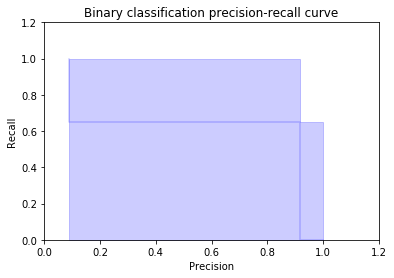

In [20]:
# plot between precison and recall
precision, recall, _ = precision_recall_curve(y_train_5, y_train_pred)

plt.step(precision, recall, color='b', alpha=0.2)
plt.fill_between(precision, recall, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.xlim([0.0, 1.2])
plt.ylim([0.0, 1.2])
plt.title('Binary classification precision-recall curve')

In [21]:
# calculating the f1-score to measure a classifier
from sklearn.metrics import f1_score
F1_score = f1_score(y_train_5, y_train_pred)
print("F1 score is: ", "{0:.2f}".format(F1_score))


F1 score is:  0.76


## Precision-Recall tradeoff

In [22]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 86656.56457974])

In [23]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [24]:
# let's change the threshold
threshold = 90000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [25]:
# compute y_scores for all instances 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [26]:
y_scores.shape

(60000, 2)

In [27]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [29]:
y_scores.shape

(60000,)

In [30]:
def plot_precision_recall_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g", label="Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

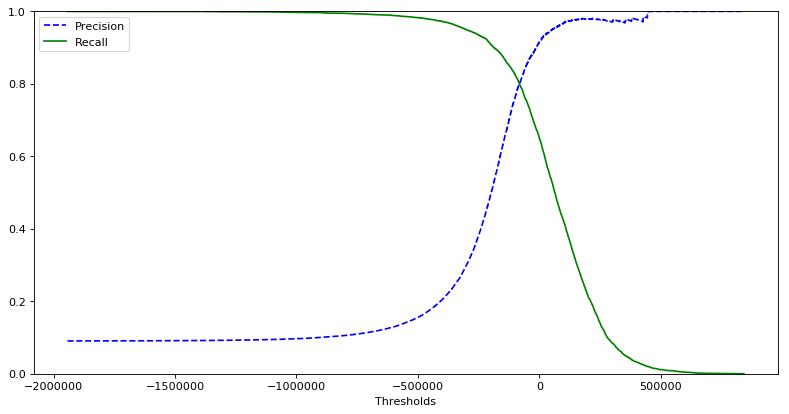

In [31]:
plt.figure(num=1, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plot_precision_recall_threshold(precisions, recalls, thresholds)
plt.show()


In [32]:
(y_train_pred == (y_scores > 0)).all()

True

In [33]:
y_train_pred_90 = (y_scores > 10000)
# to have precision score 90

In [34]:
print("%.2f" % round(precision_score(y_train_5, y_train_pred_90), 2))

0.92


In [35]:
print("%0.2f" % round(recall_score(y_train_5, y_train_pred_90), 2))

0.63


## ROC Curve

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")


<function matplotlib.pyplot.show>

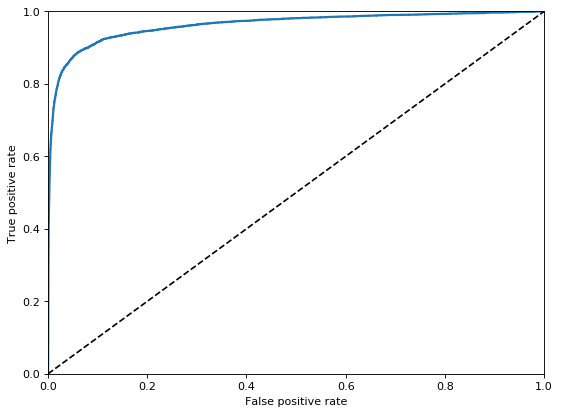

In [38]:
plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot_roc_curve(fpr, tpr)
plt.show

In [39]:
# calulate the area under curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96280370982040964

In [40]:
# let's try random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [41]:
# convet probability to score for random forest clf
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

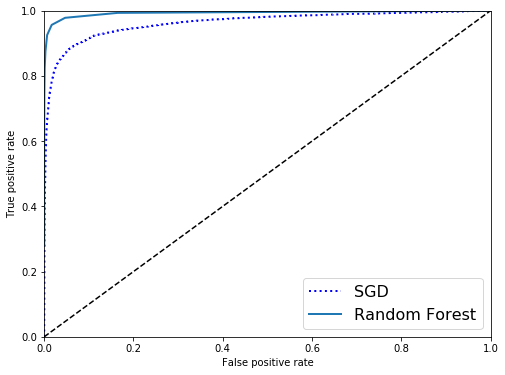

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [43]:
roc_auc_score(y_train_5, y_scores_forest) # auc score of random forest

0.99294228705928278

In [44]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [45]:
precision_score_forest = precision_score(y_train_5, y_train_pred_forest)
precision_score_forest

0.98694690265486729

In [46]:
recall_score_forest = recall_score(y_train_5, y_train_pred_forest)
recall_score_forest

0.82291090204759265